#Problem
Consider the following linear regression code (you can run it in a Jupyter notebook for a few iterations and
explore along with matplotlib)
Running this code for a few times will convince you that it gives results that are significantly wrong (very
low R2 values and coe)




In [4]:
import numpy as np
from sklearn import linear_model
SIZE_OF_SAMPLE = 100
noise = np.random.standard_cauchy(size=SIZE_OF_SAMPLE)
x_vals = np.random.uniform(low=0, high=10, size=SIZE_OF_SAMPLE)
y_vals = x_vals + noise
x_vals = x_vals.reshape(-1,1)
regressor = linear_model.LinearRegression().fit(x_vals, y_vals)
print(regressor.score(x_vals, y_vals))
print(regressor.coef_)

0.19689669624734518
[1.09115872]


#Explanation:

The prime reason for poor performance of the Ordinary linear Regression (OLR) model is its inability to deal with extreme outliers produced by the unbounded noise generated by the Cauchy's Distribution. The OLR (LinearRegression() in scikit-learn) takes Mean Squared error as its loss function and then optimizes it which is why the model gets severely punished by outliers. If the dataset was significantly large, it would not have much impact on the outcome of the regression.



The first approach to curb such problems would be using a different loss function like the Mean Absolute Error. But Mean Absolute Error also isn't the best loss function because of the infinitely unboundedness nature of the distribution. Extremely large values of noise could drive us to a similar fate. A more robust regression like a Huber regression technique which makes the model aware of the presence of Outliers. Huber Regression uses a different loss function called Huber Function which is given by 



$$
\phi(u) = \left\{ \begin{array}{ll} u^2 & |u|\leq M\\
2Mu - M^2 & |u|>M
\end{array}\right.
$$

This function behaves similar to least square function for inliers (|u| <= M), but alters the weights of the outliers. By doing so, the function decreases the influence of the outliers on the regression and gives us a better line of fit.

---

We see that it also has a significant improvement on the coefficient. This is because the model is less influenced by the outliers. Ideally, if the x_vals and y_vals are equal, the coefficient of regression would be 1. A model which is hammered by large MSE deviates from one. But since the the Cauchy Distribution has its location parameter at 0 which means that most of its values lie around 0, the coefficient of regression being slightly deviated from 1 is a good result. 

However, sometimes if the noise are mostly distributed on the negative (or +ve) side of 0 and the extreme outliers are on the positive side (or  -ve) of 0, the regression coeff would be in the closer neighborhood on 0 in case of ODE than the robust regression.   


---

R-squared value might not see any significant improvement because the data still has high variance (as the outliers still exist) and the high variance cannot be explained by the model. For a sample with low variance or small outliers, R-squared value is high and vice-versa for both the regressors. R-squared is a quantitative measure and it does not have much say on the qualitative aspect of the model. So settling with a smaller R-sqaured value is a better way to go. To get a high R-squared value, the variance of the dataset could be decreased by bounding the noise produced by the Cauchy's Distribution by its scale parameter or a scaled-up scale parameter. But removing dataset is not always a privilege, not particularly in cases where dataset is small and the problem is to understand how to take care of outliers. 



---



Submitted by

Subhas C Dahal



## let's start over again

### importing libraries


In [6]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

### generating the data and visualizing them

Text(0.5, 1.0, 'y_vals')

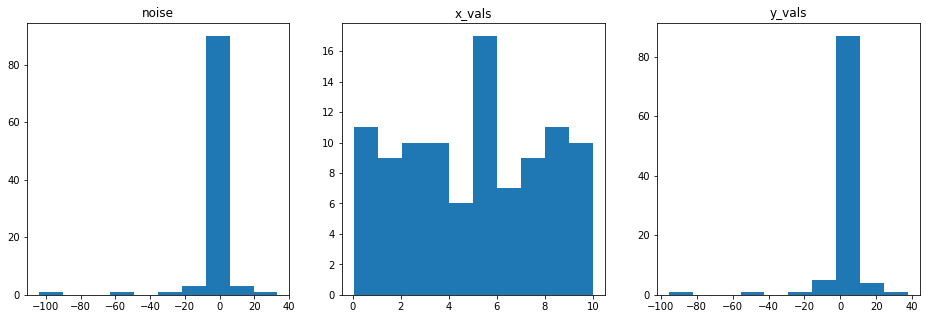

In [7]:
SIZE_OF_SAMPLE = 100
noise = np.random.standard_cauchy(size=SIZE_OF_SAMPLE)
x_vals = np.random.uniform(low=0, high=10, size=SIZE_OF_SAMPLE)
y_vals = x_vals + noise
x_vals = x_vals.reshape(-1,1)

plt.figure(figsize=(16,5))

#plotting noise
plt.subplot(1,3,1)
plt.hist(noise)
plt.title('noise')

#plotting x_vals
plt.subplot(1,3,2)
plt.hist(x_vals)
plt.title('x_vals')

#plotting x_vals
plt.subplot(1,3,3)
plt.hist(y_vals)
plt.title('y_vals')

### function for training and plotting the best fitting line

In [8]:
def plot_best_fit(x, y, model):
	# fit the model on all data
	model.fit(x, y)
	# plot the dataset
	plt.scatter(x, y)
	# plot the line of best fit
	xaxis = np.arange(x.min(), x.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	plt.plot(xaxis, yaxis, color='r')
	# show the plot
	plt.show()

### Ordinary Linear Regression

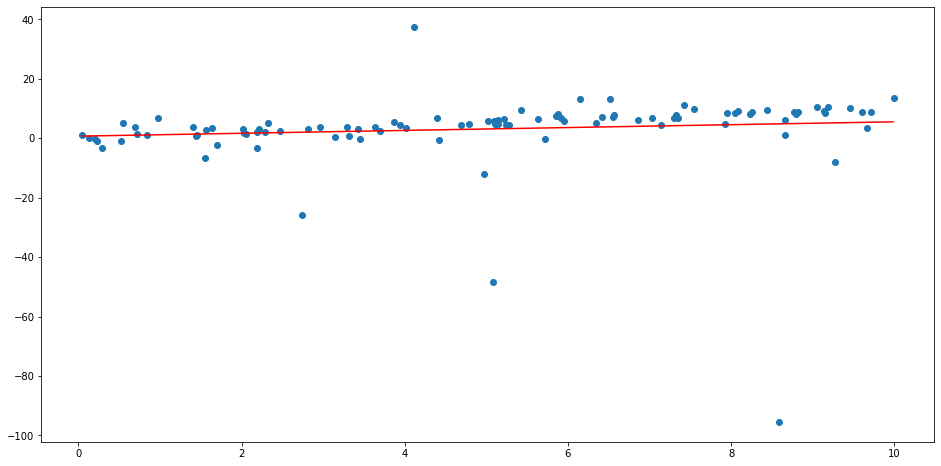

score =  0.011653418867087928
coeff =  [0.48195221]
intercept =  0.6703280904233768


In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

plt.figure(figsize = (16,8))
plot_best_fit(x_vals, y_vals, regressor)


print('score = ', regressor.score(x_vals, y_vals))
print('coeff = ', regressor.coef_)
print('intercept = ', regressor.intercept_)

### A good alternative : Robust Regression (Huber)

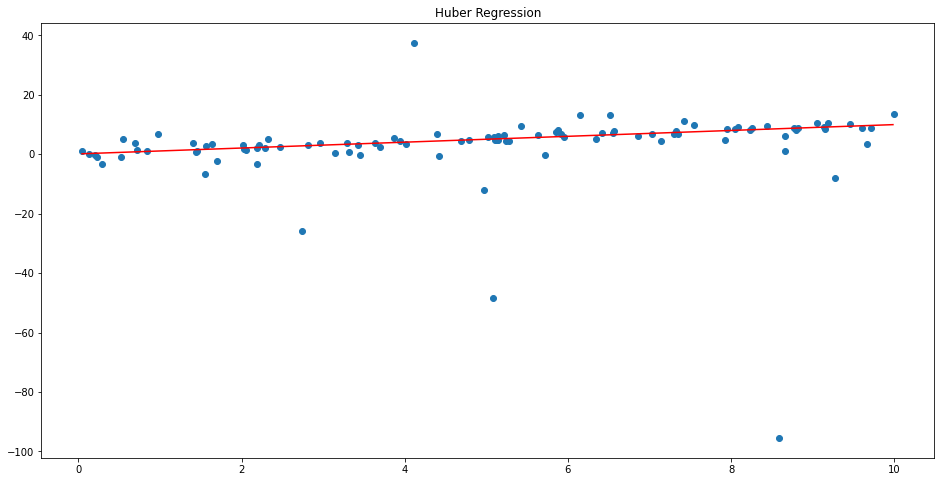

score =  -0.023650133799797635
coeff =  [0.98519526]
intercept =  0.08426315413261364


In [10]:
from sklearn.linear_model import HuberRegressor 
regressor2 = HuberRegressor() 

plt.figure(figsize = (16,8))
plt.title("Huber Regression")
plot_best_fit(x_vals, y_vals, regressor2)

print('score = ', regressor2.score(x_vals, y_vals))
print('coeff = ', regressor2.coef_)
print('intercept = ', regressor2.intercept_)